In [1]:
import torch
from dpm.models import GaussianNaiveBayes
from dpm.visualize import plot_stats

In [2]:
y = torch.cat((torch.zeros(1000), torch.ones(2000))).view(-1, 1)
y.shape

torch.Size([3000, 1])

In [3]:
x = torch.cat((1 + 2.*torch.randn(1000, 10), -1 + 2.*torch.randn(2000, 10)), dim=0)
x.shape

torch.Size([3000, 10])

In [4]:
model = GaussianNaiveBayes()

In [5]:
model.log_prob(x, y)

tensor([-47.6863, -40.1374, -16.9325,  ..., -27.9351, -70.3622, -31.0654],
       grad_fn=<SumBackward2>)

In [6]:
stats = model.fit(x, y)

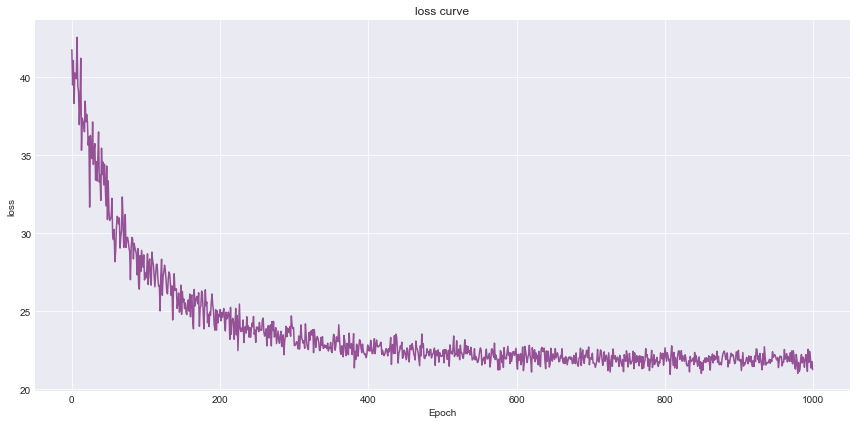

In [7]:
plot_stats(stats)

In [8]:
model.y_dist.probs

tensor([0.3538, 0.6462], grad_fn=<SoftmaxBackward>)

In [9]:
(model.predict(x) == y.long()).float().mean()

tensor(0.9553)

In [10]:
model.x_dist[0].loc

Parameter containing:
tensor([0.9098, 0.9904, 0.9322, 1.0915, 0.9931, 0.9582, 0.9876, 1.0024, 0.8832,
        0.9958], requires_grad=True)

In [11]:
model.x_dist[1].loc

Parameter containing:
tensor([-0.9967, -0.9894, -0.8917, -0.9881, -1.0509, -1.0073, -1.1005, -1.0266,
        -0.9309, -1.1026], requires_grad=True)

In [12]:
X = model.sample(5)
print(X)

tensor([[ 0.1743, -2.4009, -1.2517,  0.2993, -2.9299, -1.1006,  0.3926, -0.9760,
          0.9042, -1.0676],
        [-2.3441, -1.4295, -0.0976, -2.1934,  0.8251,  0.2468,  1.4677, -0.8193,
         -0.2692, -1.9574],
        [ 3.9100,  1.8181,  1.9394,  0.2471, -0.4786,  0.4510,  1.8642,  1.4998,
          0.3164,  1.3194],
        [-1.1279, -2.4775, -0.9055, -0.8055, -0.4586, -0.9418, -3.9911, -1.6576,
         -0.0699,  3.8748],
        [-2.1275,  1.6426,  1.7545, -0.3134,  0.8277, -0.1097,  1.9873,  1.4909,
          3.4845,  1.7746]], grad_fn=<IndexBackward>)


In [13]:
model.predict(X)

tensor([[1],
        [1],
        [0],
        [1],
        [0]])

In [15]:
x_s, y_s = model.sample(5, return_y=True)
x_s.shape, y_s.shape

(torch.Size([5, 10]), torch.Size([5, 1]))

In [16]:
(model.predict(x_s) == y_s).float().mean()

tensor(1.)